In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv('TrainingData.csv')

In [77]:
df.head(20)

,Battery ID,Working Ion,Crystal System,Spacegroup Number,Gravimetric Capacity (units),Volumetric Capacity,Max Delta Volume,mean_Number,mean_MendeleevNumber,mean_AtomicWeight,...,dev_NValance.1,dev_NsUnfilled.1,dev_NpUnfilled.1,dev_NdUnfilled.1,dev_NfUnfilled.1,dev_NUnfilled.1,dev_GSvolume_pa.1,dev_GSbandgap.1,dev_GSmagmom.1,dev_SpaceGroupNumber.1
0,mp-504791_Li,Li,Orthorombic,19,50.228609,269.262771,0.028564,20.636364,80.090909,47.877178,...,4.055556,0.152778,0.791667,1.666667,0.0,1.166667,3.871508,0.248264,0.000000,81.791667
1,mp-763480_Li,Li,Monoclinic,14,39.674483,154.215698,0.017562,16.500000,82.333333,37.144083,...,2.725762,0.099723,0.581717,1.130194,0.0,0.880886,4.449100,0.432133,0.000000,58.204986
2,mp-1176966_Li,Li,Trigonal,165,181.943205,651.708695,0.061034,14.350000,83.500000,31.582317,...,1.918367,0.090703,0.464853,0.795918,0.0,0.727891,4.719358,0.501134,0.000000,45.969388
3,mvc-5592_Li,Li,Triclinic,2,73.484217,329.726946,0.021096,16.000000,82.600000,35.778332,...,2.429752,0.165289,0.661157,0.991736,0.0,0.842975,4.785895,0.483471,0.000000,65.223140
4,mp-763566_Li,Li,Monoclinic,4,73.484217,306.081406,0.025349,16.000000,82.600000,35.778332,...,2.429752,0.165289,0.661157,0.991736,0.0,0.842975,4.785895,0.483471,0.000000,65.223140
5,mp-761353_Li,Li,Triclinic,1,101.212286,324.092098,0.020360,13.222222,84.111111,28.651514,...,1.445983,0.099723,0.421053,0.598338,0.0,0.648199,4.918702,0.540166,0.000000,41.318560
6,mp-763403_Li,Li,Orthorombic,19,51.278189,174.707261,0.015962,13.222222,84.111111,28.651514,...,1.445983,0.099723,0.421053,0.598338,0.0,0.648199,4.918702,0.540166,0.000000,41.318560
7,mp-761345_Li,Li,Monoclinic,4,52.897433,161.493674,0.031562,13.529412,83.941176,29.395756,...,1.524691,0.104938,0.444444,0.629630,0.0,0.672840,5.058836,0.561728,0.000000,43.358025
8,mp-763392_Li,Li,Monoclinic,12,52.897433,160.097352,0.012778,13.529412,83.941176,29.395756,...,1.524691,0.104938,0.444444,0.629630,0.0,0.672840,5.058836,0.561728,0.000000,43.358025
9,mp-763466_Li,Li,Monoclinic,15,52.897433,184.484997,0.027870,13.529412,83.941176,29.395756,...,1.524691,0.104938,0.444444,0.629630,0.0,0.672840,5.058836,0.561728,0.000000,43.358025


In [14]:
df.columns

Index(['Battery ID', 'Working Ion', 'Crystal System', 'Spacegroup Number',
       'Gravimetric Capacity (units)', 'Volumetric Capacity',
       'Max Delta Volume', 'mean_Number', 'mean_MendeleevNumber',
       'mean_AtomicWeight', 'mean_MeltingT', 'mean_Column', 'mean_Row',
       'mean_CovalentRadius', 'mean_Electronegativity', 'mean_NsValence',
       'mean_NpValence', 'mean_NdValence', 'mean_NfValence', 'mean_NValance',
       'mean_NsUnfilled', 'mean_NpUnfilled', 'mean_NdUnfilled',
       'mean_NfUnfilled', 'mean_NUnfilled', 'mean_GSvolume_pa',
       'mean_GSbandgap', 'mean_GSmagmom', 'mean_SpaceGroupNumber',
       'dev_Number', 'dev_MendeleevNumber', 'dev_AtomicWeight', 'dev_MeltingT',
       'dev_Column', 'dev_Row', 'dev_CovalentRadius', 'dev_Electronegativity',
       'dev_NsValence', 'dev_NpValence', 'dev_NdValence', 'dev_NfValence',
       'dev_NValance', 'dev_NsUnfilled', 'dev_NpUnfilled', 'dev_NdUnfilled',
       'dev_NfUnfilled', 'dev_NUnfilled', 'dev_GSvolume_pa', 'dev_G

In [24]:
X = np.array(df.loc[:,['Spacegroup Number', 'Gravimetric Capacity (units)', 'Volumetric Capacity',
                       'Max Delta Volume', 'mean_Number', 'mean_MendeleevNumber',
                       'mean_AtomicWeight', 'mean_MeltingT', 'mean_Column', 'mean_Row',
                       'mean_CovalentRadius', 'mean_Electronegativity', 'mean_NsValence',
                       'mean_NpValence', 'mean_NdValence', 'mean_NfValence', 'mean_NValance',
                       'mean_NsUnfilled', 'mean_NpUnfilled', 'mean_NdUnfilled',
                       'mean_NfUnfilled', 'mean_NUnfilled', 'mean_GSvolume_pa',
                       'mean_GSbandgap', 'mean_GSmagmom', 'mean_SpaceGroupNumber',
                       'dev_Number', 'dev_MendeleevNumber', 'dev_AtomicWeight', 'dev_MeltingT',
                       'dev_Column', 'dev_Row', 'dev_CovalentRadius', 'dev_Electronegativity',
                       'dev_NsValence', 'dev_NpValence', 'dev_NdValence', 'dev_NfValence',
                       'dev_NValance', 'dev_NsUnfilled', 'dev_NpUnfilled', 'dev_NdUnfilled',
                       'dev_NfUnfilled', 'dev_NUnfilled', 'dev_GSvolume_pa', 'dev_GSbandgap',
                       'dev_GSmagmom', 'dev_SpaceGroupNumber', 'mean_Number.1',
                       'mean_MendeleevNumber.1', 'mean_AtomicWeight.1', 'mean_MeltingT.1',
                       'mean_Column.1', 'mean_Row.1', 'mean_CovalentRadius.1',
                       'mean_Electronegativity.1', 'mean_NsValence.1', 'mean_NpValence.1',
                       'mean_NdValence.1', 'mean_NfValence.1', 'mean_NValance.1',
                       'mean_NsUnfilled.1', 'mean_NpUnfilled.1', 'mean_NdUnfilled.1',
                       'mean_NfUnfilled.1', 'mean_NUnfilled.1', 'mean_GSvolume_pa.1',
                       'mean_GSbandgap.1', 'mean_GSmagmom.1', 'mean_SpaceGroupNumber.1',
                       'dev_Number.1', 'dev_MendeleevNumber.1', 'dev_AtomicWeight.1',
                       'dev_MeltingT.1', 'dev_Column.1', 'dev_Row.1', 'dev_CovalentRadius.1',
                       'dev_Electronegativity.1', 'dev_NsValence.1', 'dev_NpValence.1',
                       'dev_NdValence.1', 'dev_NfValence.1', 'dev_NValance.1',
                       'dev_NsUnfilled.1', 'dev_NpUnfilled.1', 'dev_NdUnfilled.1',
                       'dev_NfUnfilled.1', 'dev_NUnfilled.1', 'dev_GSvolume_pa.1',
                       'dev_GSbandgap.1', 'dev_GSmagmom.1', 'dev_SpaceGroupNumber.1']])

In [48]:
pca = PCA(n_components=92)
newX=pca.fit_transform(X)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[5.79489491e-01 3.08004826e-01 7.98338412e-02 1.08195742e-02
 7.60398481e-03 6.52012599e-03 3.22074912e-03 1.80574734e-03
 1.20977090e-03 5.66781546e-04 2.73874338e-04 2.03836183e-04
 1.38365108e-04 8.86821616e-05 5.31457532e-05 3.27047599e-05
 2.90711270e-05 2.25292088e-05 2.02065896e-05 1.68437542e-05
 1.02522856e-05 8.93996048e-06 6.60472803e-06 4.08324212e-06
 2.94762624e-06 2.40852821e-06 1.77663591e-06 1.37323061e-06
 1.24149734e-06 1.11381121e-06 9.14060318e-07 6.39529426e-07
 5.15248951e-07 4.21924099e-07 3.77756536e-07 2.80981024e-07
 2.75424653e-07 2.42956807e-07 2.34501479e-07 1.72155170e-07
 1.43507021e-07 1.32858572e-07 1.07574811e-07 8.56693410e-08
 7.84925887e-08 7.18283614e-08 5.87621725e-08 4.37371975e-08
 4.07121897e-08 3.75464208e-08 3.23357336e-08 3.16577451e-08
 2.32362914e-08 2.23712892e-08 1.70450189e-08 1.62398949e-08
 1.20475731e-08 1.04943127e-08 8.84616120e-09 8.07064503e-09
 7.16752473e-09 6.35602202e-09 5.39482675e-09 4.54789297e-09
 3.49423975e-09 3.380249

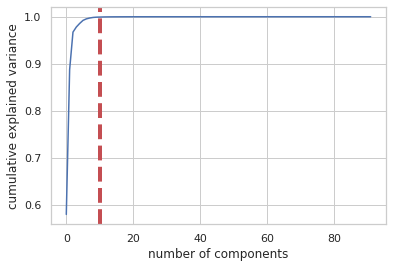

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.579489,0.579489
1,0.887494,0.308005
2,0.967328,0.079834
3,0.978148,0.010820
4,0.985752,0.007604
5,0.992272,0.006520
6,0.995493,0.003221
7,0.997298,0.001806
8,0.998508,0.001210
9,0.999075,0.000567


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline
pca_test = PCA(n_components=92)
pca_test.fit(X)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(20))

In [13]:
#newX.to_csv(NEWTrainingData.csv)

<bound method BaseEstimator.get_params of PCA(copy=True, iterated_power='auto', n_components='mle', random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)>

In [74]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
sg=lb.fit_transform(np.array(df.loc[:,['Spacegroup Number']]))
el=np.array(df.loc[:,['Gravimetric Capacity (units)', 'Volumetric Capacity',
                       'Max Delta Volume', 'mean_Number', 'mean_MendeleevNumber',
                       'mean_AtomicWeight', 'mean_MeltingT', 'mean_Column', 'mean_Row',
                       'mean_CovalentRadius', 'mean_Electronegativity', 'mean_NsValence',
                       'mean_NpValence', 'mean_NdValence', 'mean_NfValence', 'mean_NValance',
                       'mean_NsUnfilled', 'mean_NpUnfilled', 'mean_NdUnfilled',
                       'mean_NfUnfilled', 'mean_NUnfilled', 'mean_GSvolume_pa',
                       'mean_GSbandgap', 'mean_GSmagmom', 'mean_SpaceGroupNumber',
                       'dev_Number', 'dev_MendeleevNumber', 'dev_AtomicWeight', 'dev_MeltingT',
                       'dev_Column', 'dev_Row', 'dev_CovalentRadius', 'dev_Electronegativity',
                       'dev_NsValence', 'dev_NpValence', 'dev_NdValence', 'dev_NfValence',
                       'dev_NValance', 'dev_NsUnfilled', 'dev_NpUnfilled', 'dev_NdUnfilled',
                       'dev_NfUnfilled', 'dev_NUnfilled', 'dev_GSvolume_pa', 'dev_GSbandgap',
                       'dev_GSmagmom', 'dev_SpaceGroupNumber', 'mean_Number.1',
                       'mean_MendeleevNumber.1', 'mean_AtomicWeight.1', 'mean_MeltingT.1',
                       'mean_Column.1', 'mean_Row.1', 'mean_CovalentRadius.1',
                       'mean_Electronegativity.1', 'mean_NsValence.1', 'mean_NpValence.1',
                       'mean_NdValence.1', 'mean_NfValence.1', 'mean_NValance.1',
                       'mean_NsUnfilled.1', 'mean_NpUnfilled.1', 'mean_NdUnfilled.1',
                       'mean_NfUnfilled.1', 'mean_NUnfilled.1', 'mean_GSvolume_pa.1',
                       'mean_GSbandgap.1', 'mean_GSmagmom.1', 'mean_SpaceGroupNumber.1',
                       'dev_Number.1', 'dev_MendeleevNumber.1', 'dev_AtomicWeight.1',
                       'dev_MeltingT.1', 'dev_Column.1', 'dev_Row.1', 'dev_CovalentRadius.1',
                       'dev_Electronegativity.1', 'dev_NsValence.1', 'dev_NpValence.1',
                       'dev_NdValence.1', 'dev_NfValence.1', 'dev_NValance.1',
                       'dev_NsUnfilled.1', 'dev_NpUnfilled.1', 'dev_NdUnfilled.1',
                       'dev_NfUnfilled.1', 'dev_NUnfilled.1', 'dev_GSvolume_pa.1',
                       'dev_GSbandgap.1', 'dev_GSmagmom.1', 'dev_SpaceGroupNumber.1']])
prop=np.hstack((sg, el))
prop.shape

(4401, 227)

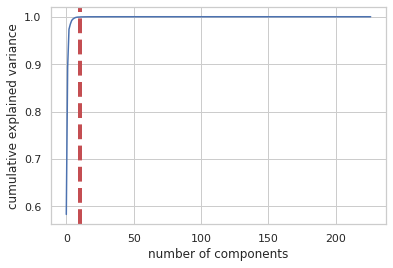

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.583254,0.583254
1,0.893612,0.310358
2,0.973640,0.080028
3,0.984450,0.010810
4,0.992093,0.007643
5,0.995353,0.003260
6,0.997192,0.001839
7,0.998487,0.001296
8,0.999059,0.000571
9,0.999337,0.000278


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline
pca_test = PCA(n_components=227)
pca_test.fit(prop)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(20))